In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from thefuzz import process
from thefuzz import process, fuzz


#PASO 1: cargar dataset
#ruta_archivo = 'C:/Users/maron.LAPTOP-UEJMOSD4/Desktop/PI_2/Internet.xlsx'

# Paso 2: Cargar el archivo y obtener los nombres de las hojas
#xls = pd.ExcelFile(ruta_archivo)
#nombres_hojas = xls.sheet_names
#print("Hojas de cálculo en el archivo:", nombres_hojas)

# Paso 3: Crear un DataFrame por cada hoja y guardarlo en la carpeta DATA_LIMPIO
#for hoja in nombres_hojas:
    #df = pd.read_excel(ruta_archivo, sheet_name=hoja)
    #nombre_archivo = f"C:/Users/maron.LAPTOP-UEJMOSD4/Desktop/PI_2/DATA_LIMPIO{hoja}.csv"
    #df.to_csv(nombre_archivo, index=False)
    #print(f"Archivo guardado: {nombre_archivo}")

In [2]:
import pandas as pd

# Reemplaza 'nombre_archivo.csv' con el nombre de tu archivo CSV
archivo_csv = 'C:/Users/maron.LAPTOP-UEJMOSD4/Desktop/PI_2/DATA_LIMPIO/Accesos por rangos.csv'

# Carga el archivo CSV en un DataFrame
df_Accesos_por_rangos = pd.read_csv(archivo_csv)

# Muestra las primeras 5 filas del DataFrame
print(f"Mostrando las primeras 5 filas de {archivo_csv}:")
print(df_Accesos_por_rangos.head())

Mostrando las primeras 5 filas de C:/Users/maron.LAPTOP-UEJMOSD4/Desktop/PI_2/DATA_LIMPIO/Accesos por rangos.csv:
    Año  Trimestre        Provincia  HASTA 512 kbps  + 512 Kbps - 1 Mbps  \
0  2024          2     Buenos Aires         25287.0              23034.0   
1  2024          2  Capital Federal           518.0               4122.0   
2  2024          2        Catamarca            72.0                164.0   
3  2024          2            Chaco           236.0                349.0   
4  2024          2           Chubut           125.0               1139.0   

   + 1 Mbps - 6 Mbps  + 6 Mbps - 10 Mbps  + 10 Mbps - 20 Mbps  \
0           222627.0            221660.0             244528.0   
1            24539.0             40296.0              33158.0   
2             2660.0              3093.0               3799.0   
3            14594.0              8336.0               6208.0   
4            43699.0             31971.0              22696.0   

   + 20 Mbps - 30 Mbps  + 30 Mbps     

In [4]:
import pandas as pd

# Cargar el archivo CSV original
df_Accesos_por_rangos = pd.read_csv("C:/Users/maron.LAPTOP-UEJMOSD4/Desktop/PI_2/DATA_LIMPIO/Accesos por rangos.csv")

# Agregar la columna 'país' con el valor 'Argentina'
df_Accesos_por_rangos['país'] = 'Argentina'

# Reordenar las columnas para que 'país' esté al principio
columns = ['país'] + [col for col in df_Accesos_por_rangos.columns if col != 'país']
df_Accesos_por_rangos = df_Accesos_por_rangos[columns]

# Verificar los primeros registros para asegurarte de que la columna 'país' fue agregada correctamente
print(df_Accesos_por_rangos.head())

        país   Año  Trimestre        Provincia  HASTA 512 kbps  \
0  Argentina  2024          2     Buenos Aires         25287.0   
1  Argentina  2024          2  Capital Federal           518.0   
2  Argentina  2024          2        Catamarca            72.0   
3  Argentina  2024          2            Chaco           236.0   
4  Argentina  2024          2           Chubut           125.0   

   + 512 Kbps - 1 Mbps  + 1 Mbps - 6 Mbps  + 6 Mbps - 10 Mbps  \
0              23034.0           222627.0            221660.0   
1               4122.0            24539.0             40296.0   
2                164.0             2660.0              3093.0   
3                349.0            14594.0              8336.0   
4               1139.0            43699.0             31971.0   

   + 10 Mbps - 20 Mbps  + 20 Mbps - 30 Mbps  + 30 Mbps     OTROS      Total  
0             244528.0             106302.0  4020395.0  125547.0  4989380.0  
1              33158.0               5633.0  1355333.0  

In [5]:
print("Valores únicos en 'Provincia':")
print(df_Accesos_por_rangos['Provincia'].unique())


Valores únicos en 'Provincia':
['Buenos Aires' 'Capital Federal' 'Catamarca' 'Chaco' 'Chubut' 'Córdoba'
 'Corrientes' 'Entre Ríos' 'Formosa' 'Jujuy' 'La Pampa' 'La Rioja'
 'Mendoza' 'Misiones' 'Neuquén' 'Río Negro' 'Salta' 'San Juan' 'San Luis'
 'Santa Cruz' 'Santa Fe' 'Santiago Del Estero' 'Tierra Del Fuego'
 'Tucumán']


In [6]:
# Contar los valores únicos en cada columna
print("Conteo de valores únicos en 'Provincia':")
print(df_Accesos_por_rangos['Provincia'].nunique())  # Conteo de valores únicos en Provincia

Conteo de valores únicos en 'Provincia':
24


In [7]:
# Verificar valores únicos en cada columna
print("Valores únicos en 'Provincia':")
print(df_Accesos_por_rangos['Provincia'].unique())

Valores únicos en 'Provincia':
['Buenos Aires' 'Capital Federal' 'Catamarca' 'Chaco' 'Chubut' 'Córdoba'
 'Corrientes' 'Entre Ríos' 'Formosa' 'Jujuy' 'La Pampa' 'La Rioja'
 'Mendoza' 'Misiones' 'Neuquén' 'Río Negro' 'Salta' 'San Juan' 'San Luis'
 'Santa Cruz' 'Santa Fe' 'Santiago Del Estero' 'Tierra Del Fuego'
 'Tucumán']


In [9]:
# Información general sobre el DataFrame
print("Información general del DataFrame:")
df_Accesos_por_rangos.info()

Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   país                 1000 non-null   object 
 1   Año                  1000 non-null   int64  
 2   Trimestre            1000 non-null   int64  
 3   Provincia            1000 non-null   object 
 4   HASTA 512 kbps       1000 non-null   float64
 5   + 512 Kbps - 1 Mbps  1000 non-null   float64
 6   + 1 Mbps - 6 Mbps    1000 non-null   float64
 7   + 6 Mbps - 10 Mbps   1000 non-null   float64
 8   + 10 Mbps - 20 Mbps  1000 non-null   float64
 9   + 20 Mbps - 30 Mbps  1000 non-null   float64
 10  + 30 Mbps            1000 non-null   float64
 11  OTROS                994 non-null    float64
 12  Total                1000 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 101.7+ KB


In [11]:
# Revisar si hay valores vacíos o nulos
print("Valores nulos en 'Provincia':")
print(df_Accesos_por_rangos['Provincia'].isnull().sum())

print("Valores nulos en 'Año':")
print(df_Accesos_por_rangos['Año'].isnull().sum())

print("Valores nulos en 'Trimestre':")
print(df_Accesos_por_rangos['Trimestre'].isnull().sum())

# Verificar si hay espacios adicionales o diferencias
df_Accesos_por_rangos['Provincia'] = df_Accesos_por_rangos['Provincia'].str.strip().str.title()



# Recontar los valores únicos después de la limpieza
print("Valores únicos después de limpiar espacios y capitalización:")
print("Provincia:", df_Accesos_por_rangos['Provincia'].nunique())
print("Año:", df_Accesos_por_rangos['Año'].nunique())
print("Trimestre:", df_Accesos_por_rangos['Trimestre'].nunique())


Valores nulos en 'Provincia':
0
Valores nulos en 'Año':
0
Valores nulos en 'Trimestre':
0
Valores únicos después de limpiar espacios y capitalización:
Provincia: 24
Año: 11
Trimestre: 4


In [12]:
# Revisión de valores NaN en todo el DataFrame
print("\nRevisión de valores nulos en todo el DataFrame:")
print(df_Accesos_por_rangos.isnull().sum())

# Verificar si hay valores negativos en las columnas numéricas
print("\nVerificación de valores negativos:")
for col in df_Accesos_por_rangos.select_dtypes(include='number').columns:
    negativos = df_Accesos_por_rangos[col][df_Accesos_por_rangos[col] < 0].count()
    if negativos > 0:
        print(f"La columna '{col}' contiene {negativos} valores negativos.")
    else:
        print(f"La columna '{col}' no contiene valores negativos.")



Revisión de valores nulos en todo el DataFrame:
país                   0
Año                    0
Trimestre              0
Provincia              0
HASTA 512 kbps         0
+ 512 Kbps - 1 Mbps    0
+ 1 Mbps - 6 Mbps      0
+ 6 Mbps - 10 Mbps     0
+ 10 Mbps - 20 Mbps    0
+ 20 Mbps - 30 Mbps    0
+ 30 Mbps              0
OTROS                  6
Total                  0
dtype: int64

Verificación de valores negativos:
La columna 'Año' no contiene valores negativos.
La columna 'Trimestre' no contiene valores negativos.
La columna 'HASTA 512 kbps' no contiene valores negativos.
La columna '+ 512 Kbps - 1 Mbps' no contiene valores negativos.
La columna '+ 1 Mbps - 6 Mbps' no contiene valores negativos.
La columna '+ 6 Mbps - 10 Mbps' no contiene valores negativos.
La columna '+ 10 Mbps - 20 Mbps' no contiene valores negativos.
La columna '+ 20 Mbps - 30 Mbps' no contiene valores negativos.
La columna '+ 30 Mbps' no contiene valores negativos.
La columna 'OTROS' contiene 2 valores negativ

In [13]:
# Estadísticas descriptivas de las columnas numéricas
print("\nEstadísticas descriptivas del DataFrame:")
df_Accesos_por_rangos.describe()


Estadísticas descriptivas del DataFrame:


,Año,Trimestre,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1.000000e+03,994.000000,1.000000e+03
mean,2018.824000,2.464000,1953.317000,8864.257000,1.327725e+05,38408.510000,37138.329000,20091.330000,1.222098e+05,6510.467807,3.679094e+05
std,3.058493,1.114426,12676.575806,20312.520997,3.222569e+05,64156.365883,88290.744464,69299.281156,4.657500e+05,15344.465875,7.899348e+05
min,2014.000000,1.000000,6.000000,0.000000,1.124000e+03,0.000000,0.000000,0.000000,0.000000e+00,-1945.000000,1.240600e+04
25%,2016.000000,1.000000,43.250000,389.750000,2.381250e+04,3876.750000,2706.750000,43.750000,1.500000e+01,0.000000,6.234225e+04
50%,2019.000000,2.000000,107.000000,2061.000000,4.213250e+04,13932.000000,10503.000000,1658.000000,4.253500e+03,346.500000,1.136205e+05
75%,2021.000000,3.000000,466.250000,6851.500000,8.371025e+04,42593.500000,26463.750000,10109.250000,4.339925e+04,6830.750000,1.969198e+05
max,2024.000000,4.000000,238920.000000,171244.480000,2.299705e+06,403575.000000,886678.000000,949093.000000,4.068292e+06,125547.000000,5.044557e+06


In [14]:
# Contar valores únicos por cada columna categórica
print("Frecuencia de valores en 'Provincia':")
print(df_Accesos_por_rangos['Provincia'].value_counts())


Frecuencia de valores en 'Provincia':
Provincia
Buenos Aires           42
Capital Federal        42
Catamarca              42
Chaco                  42
Chubut                 42
Córdoba                42
Corrientes             42
Entre Ríos             42
Formosa                42
Jujuy                  42
La Pampa               42
La Rioja               42
Mendoza                42
Misiones               42
Neuquén                42
Río Negro              42
Salta                  41
San Juan               41
San Luis               41
Santa Cruz             41
Santa Fe               41
Santiago Del Estero    41
Tierra Del Fuego       41
Tucumán                41
Name: count, dtype: int64


In [15]:
print("\nFrecuencia de valores en 'Año':")
print(df_Accesos_por_rangos['Año'].value_counts())


Frecuencia de valores en 'Año':
Año
2022    96
2020    96
2021    96
2017    96
2016    96
2019    96
2018    96
2015    96
2014    88
2023    72
2024    72
Name: count, dtype: int64


In [16]:

print("\nFrecuencia de valores en 'Trimestre':")
print(df_Accesos_por_rangos['Trimestre'].value_counts())


Frecuencia de valores en 'Trimestre':
Trimestre
2    264
1    256
4    240
3    240
Name: count, dtype: int64


In [17]:
# Estadísticas descriptivas para columnas categóricas
print("\nEstadísticas descriptivas de 'Provincia':")
print(df_Accesos_por_rangos['Provincia'].describe())



Estadísticas descriptivas de 'Provincia':
count             1000
unique              24
top       Buenos Aires
freq                42
Name: Provincia, dtype: object


In [18]:
print("\nEstadísticas descriptivas de 'Año':")
print(df_Accesos_por_rangos['Año'].describe())


Estadísticas descriptivas de 'Año':
count    1000.000000
mean     2018.824000
std         3.058493
min      2014.000000
25%      2016.000000
50%      2019.000000
75%      2021.000000
max      2024.000000
Name: Año, dtype: float64


In [19]:

print("\nEstadísticas descriptivas de 'Trimestre':")
print(df_Accesos_por_rangos['Trimestre'].describe())


Estadísticas descriptivas de 'Trimestre':
count    1000.000000
mean        2.464000
std         1.114426
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: Trimestre, dtype: float64


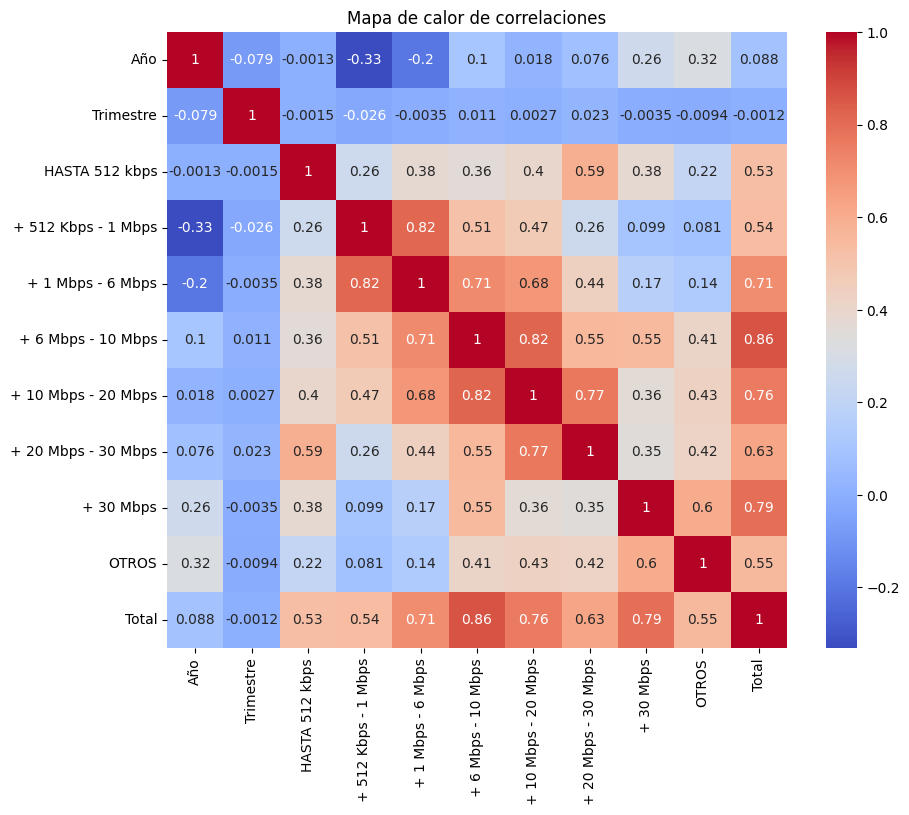

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo las columnas numéricas del DataFrame
numeric_df = df_Accesos_por_rangos.select_dtypes(include=['number'])

# Análisis de correlaciones entre las velocidades y accesos
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de calor de correlaciones')
plt.show()


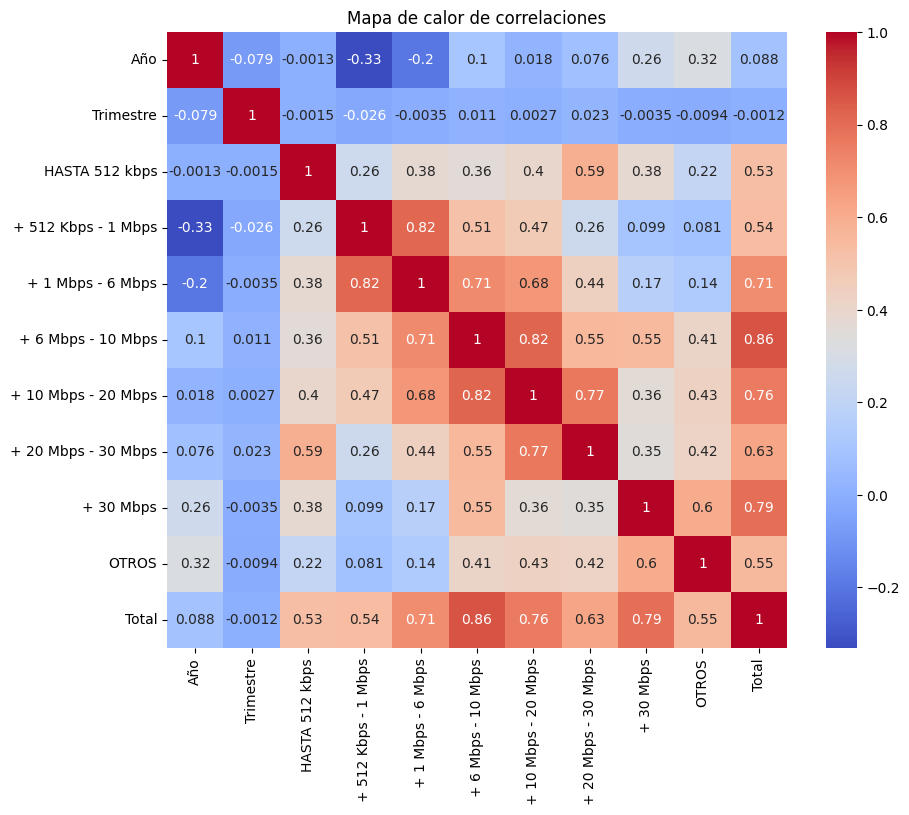

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo las columnas numéricas del DataFrame
numeric_df = df_Accesos_por_rangos.select_dtypes(include=['number'])

# Análisis de correlaciones entre las velocidades y accesos
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de calor de correlaciones')
plt.show()


Columnas numéricas seleccionadas para el análisis de correlación:
    Año  Trimestre  HASTA 512 kbps  + 512 Kbps - 1 Mbps  + 1 Mbps - 6 Mbps  \
0  2024          2         25287.0              23034.0           222627.0   
1  2024          2           518.0               4122.0            24539.0   
2  2024          2            72.0                164.0             2660.0   
3  2024          2           236.0                349.0            14594.0   
4  2024          2           125.0               1139.0            43699.0   

   + 6 Mbps - 10 Mbps  + 10 Mbps - 20 Mbps  + 20 Mbps - 30 Mbps  + 30 Mbps  \
0            221660.0             244528.0             106302.0  4020395.0   
1             40296.0              33158.0               5633.0  1355333.0   
2              3093.0               3799.0               1279.0    63954.0   
3              8336.0               6208.0               6454.0   107707.0   
4             31971.0              22696.0              19827.0    38212.0 

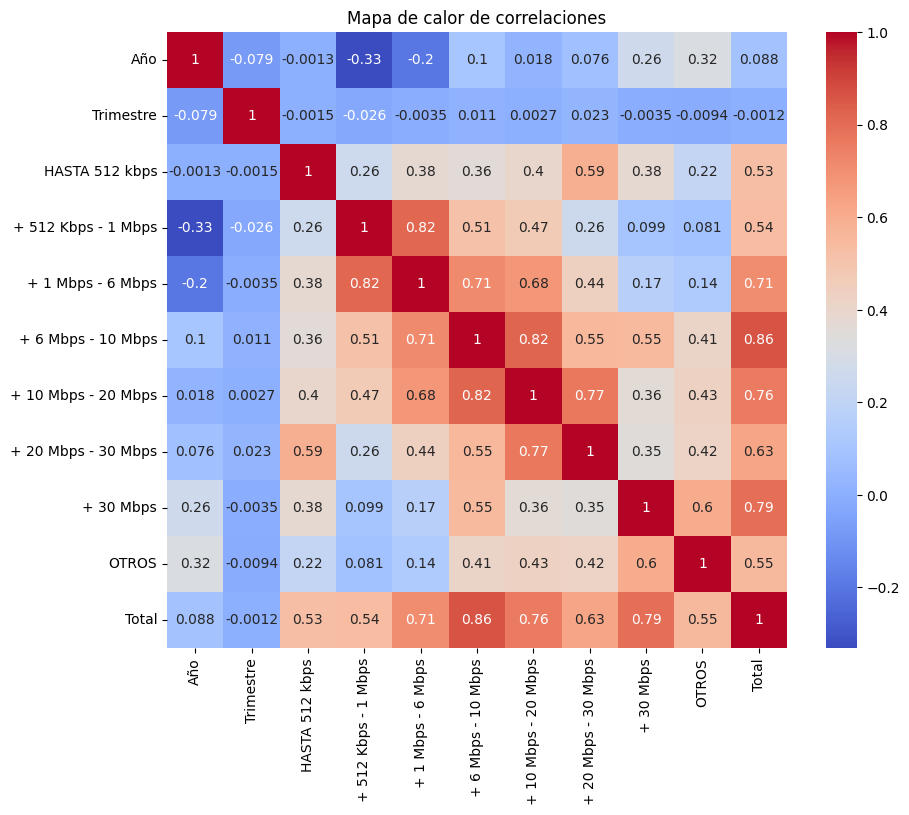

In [21]:
# Seleccionar solo las columnas numéricas
numerical_cols = df_Accesos_por_rangos.select_dtypes(include='number')

# Verificar el DataFrame filtrado
print("Columnas numéricas seleccionadas para el análisis de correlación:")
print(numerical_cols.head())

# Análisis de correlaciones entre las velocidades y accesos con solo columnas numéricas
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_cols.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de calor de correlaciones')
plt.show()


In [23]:
import pandas as pd
from pydantic import BaseModel, validator, ValidationError

# Definir un modelo de Pydantic adaptado a tus datos
class AccesosRecord(BaseModel):
    año: int
    trimestre: int
    provincia: str
    hasta_512_kbps: float
    entre_512_kbps_y_1_mbps: float
    entre_1_mbps_y_6_mbps: float
    entre_6_mbps_y_10_mbps: float
    entre_10_mbps_y_20_mbps: float
    entre_20_mbps_y_30_mbps: float
    mas_de_30_mbps: float
    otros: float
    total: float

    # Validar que el año sea razonable (ejemplo)
    @validator('año')
    def check_year(cls, value):
        if value < 2000 or value > 2024:
            raise ValueError("El año debe estar entre 2000 y 2024")
        return value

    # Validar que los valores de accesos no sean negativos
    @validator('*', pre=True)
    def check_non_negative(cls, value):
        if isinstance(value, (int, float)) and value < 0:
            raise ValueError("Los valores numéricos no pueden ser negativos")
        return value

# Cargar datos de un archivo CSV
#df = pd.read_csv('ruta_a_tu_csv.csv')

# Validar y limpiar datos usando Pydantic
valid_records = []
for _, row in df_Accesos_por_rangos.iterrows():
    try:
        record = AccesosRecord(**row.to_dict())
        valid_records.append(record.dict())
    except ValidationError as e:
        print(f"Error en la fila con año {row['Año']} y trimestre {row['Trimestre']}: {e}")

# Crear un nuevo DataFrame con los registros validados
#clean_df = pd.DataFrame(valid_records)

# Guardar el DataFrame limpio en un nuevo archivo CSV si es necesario
#clean_df.to_csv('ruta_a_tu_csv_limpio.csv', index=False)


C:\Users\maron.LAPTOP-UEJMOSD4\AppData\Local\Temp\ipykernel_213512\2868926089.py:20: PydanticDeprecatedSince20: Pydantic V1 style `@validator` validators are deprecated. You should migrate to Pydantic V2 style `@field_validator` validators, see the migration guide for more details. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.9/migration/
  @validator('año')
C:\Users\maron.LAPTOP-UEJMOSD4\AppData\Local\Temp\ipykernel_213512\2868926089.py:27: PydanticDeprecatedSince20: Pydantic V1 style `@validator` validators are deprecated. You should migrate to Pydantic V2 style `@field_validator` validators, see the migration guide for more details. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.9/migration/
  @validator('*', pre=True)


Error en la fila con año 2024 y trimestre 2: 12 validation errors for AccesosRecord
año
  Field required [type=missing, input_value={'país': 'Argentina', 'A...7.0, 'Total': 4989380.0}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.9/v/missing
trimestre
  Field required [type=missing, input_value={'país': 'Argentina', 'A...7.0, 'Total': 4989380.0}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.9/v/missing
provincia
  Field required [type=missing, input_value={'país': 'Argentina', 'A...7.0, 'Total': 4989380.0}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.9/v/missing
hasta_512_kbps
  Field required [type=missing, input_value={'país': 'Argentina', 'A...7.0, 'Total': 4989380.0}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.9/v/missing
entre_512_kbps_y_1_mbps
  Field required [type=missing, input_value={'país': 'Argentina', 'A...7.0, 'Total': 4989380.

In [ ]:
# Correlación entre variables continuas
corr = df_Accesos_por_rangos[['Velocidad (Mbps)', 'Accesos']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Mapa de calor de correlación')
plt.show()


In [ ]:
from scipy import stats

# Calculando Z-scores
z_scores = stats.zscore(df_Accesos_por_rangos[['Velocidad (Mbps)', 'Accesos']])
print("Valores atípicos con Z-score (valor absoluto > 3):")
print(df_Accesos_por_rangos[(abs(z_scores) > 3)].head())


In [ ]:
# Conteo de categorías
print(df_Accesos_por_rangos['Provincia'].value_counts())


In [30]:
print(df_Accesos_por_rangos['Año'].value_counts())

Año
2022    96
2020    96
2021    96
2017    96
2016    96
2019    96
2018    96
2015    96
2014    88
2023    72
2024    72
Name: count, dtype: int64


In [31]:
print(df_Accesos_por_rangos['Trimestre'].value_counts())

Trimestre
2    264
1    256
4    240
3    240
Name: count, dtype: int64


Columna OTROS tiene valores negativos.


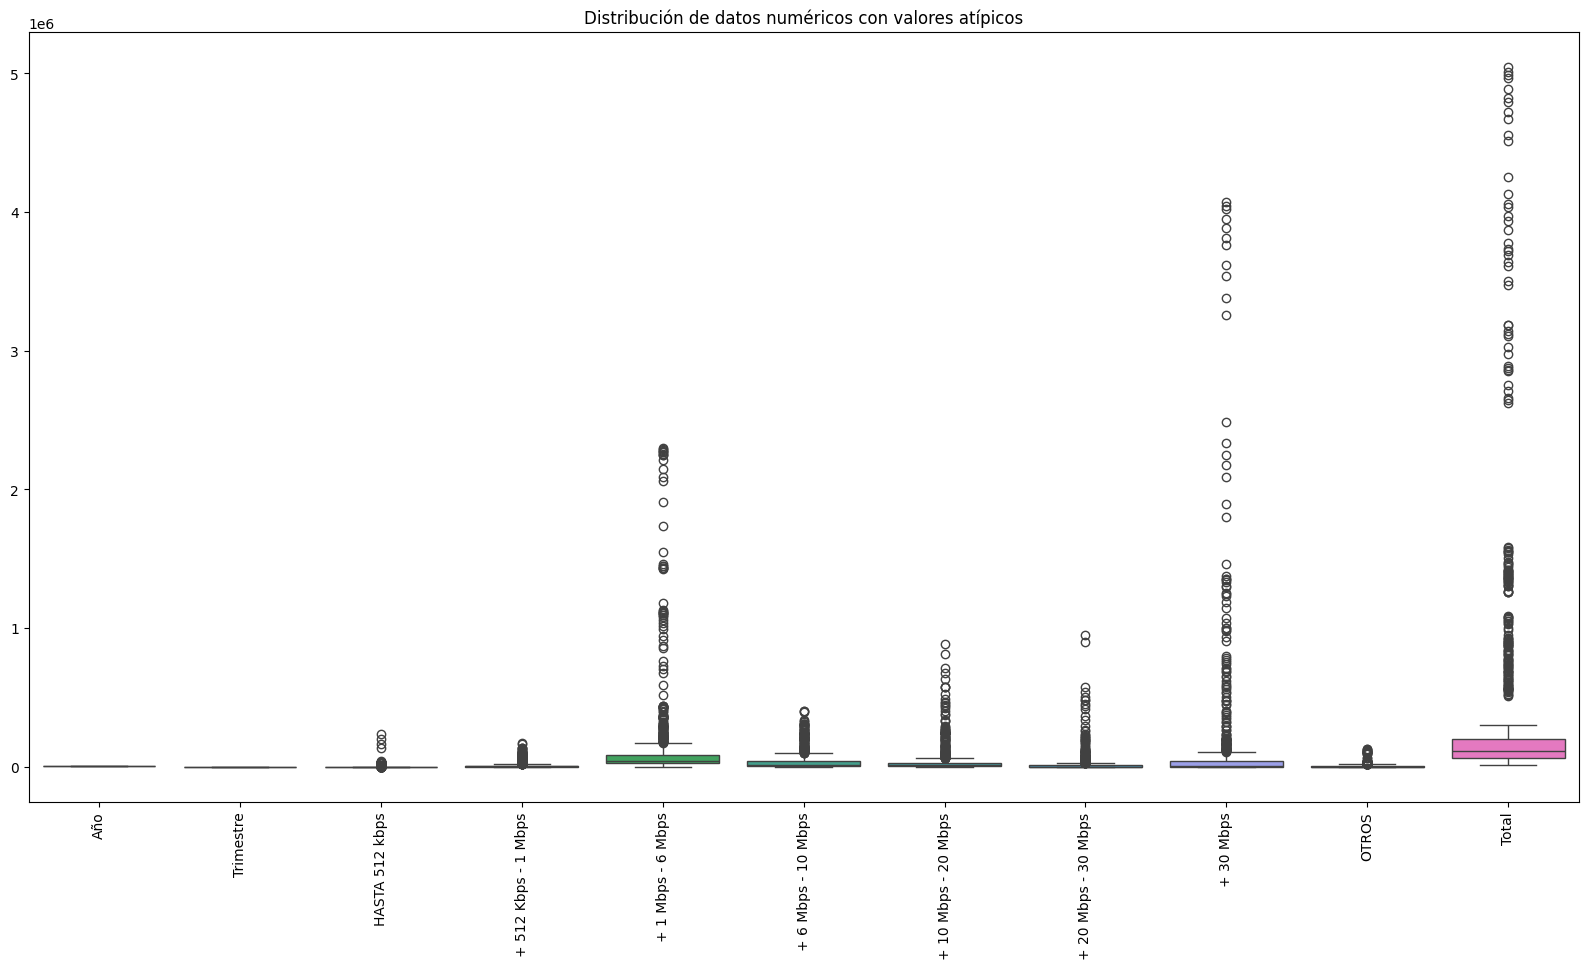

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Revisar columnas con valores negativos
for columna in df_Accesos_por_rangos.columns:
    if df_Accesos_por_rangos[columna].dtype != 'object' and (df_Accesos_por_rangos[columna] < 0).any():
        print(f"Columna {columna} tiene valores negativos.")

# Visualizar valores atípicos en las principales columnas
plt.figure(figsize=(20, 10))
sns.boxplot(data=df_Accesos_por_rangos.select_dtypes(include='number'))
plt.xticks(rotation=90)
plt.title("Distribución de datos numéricos con valores atípicos")
plt.show()

In [27]:
# Información adicional de valores nulos
print("\nConteo de valores nulos por columna:")
print(df_Accesos_por_rangos.isnull().sum())


Conteo de valores nulos por columna:
país                   0
Año                    0
Trimestre              0
Provincia              0
HASTA 512 kbps         0
+ 512 Kbps - 1 Mbps    0
+ 1 Mbps - 6 Mbps      0
+ 6 Mbps - 10 Mbps     0
+ 10 Mbps - 20 Mbps    0
+ 20 Mbps - 30 Mbps    0
+ 30 Mbps              0
OTROS                  6
Total                  0
dtype: int64


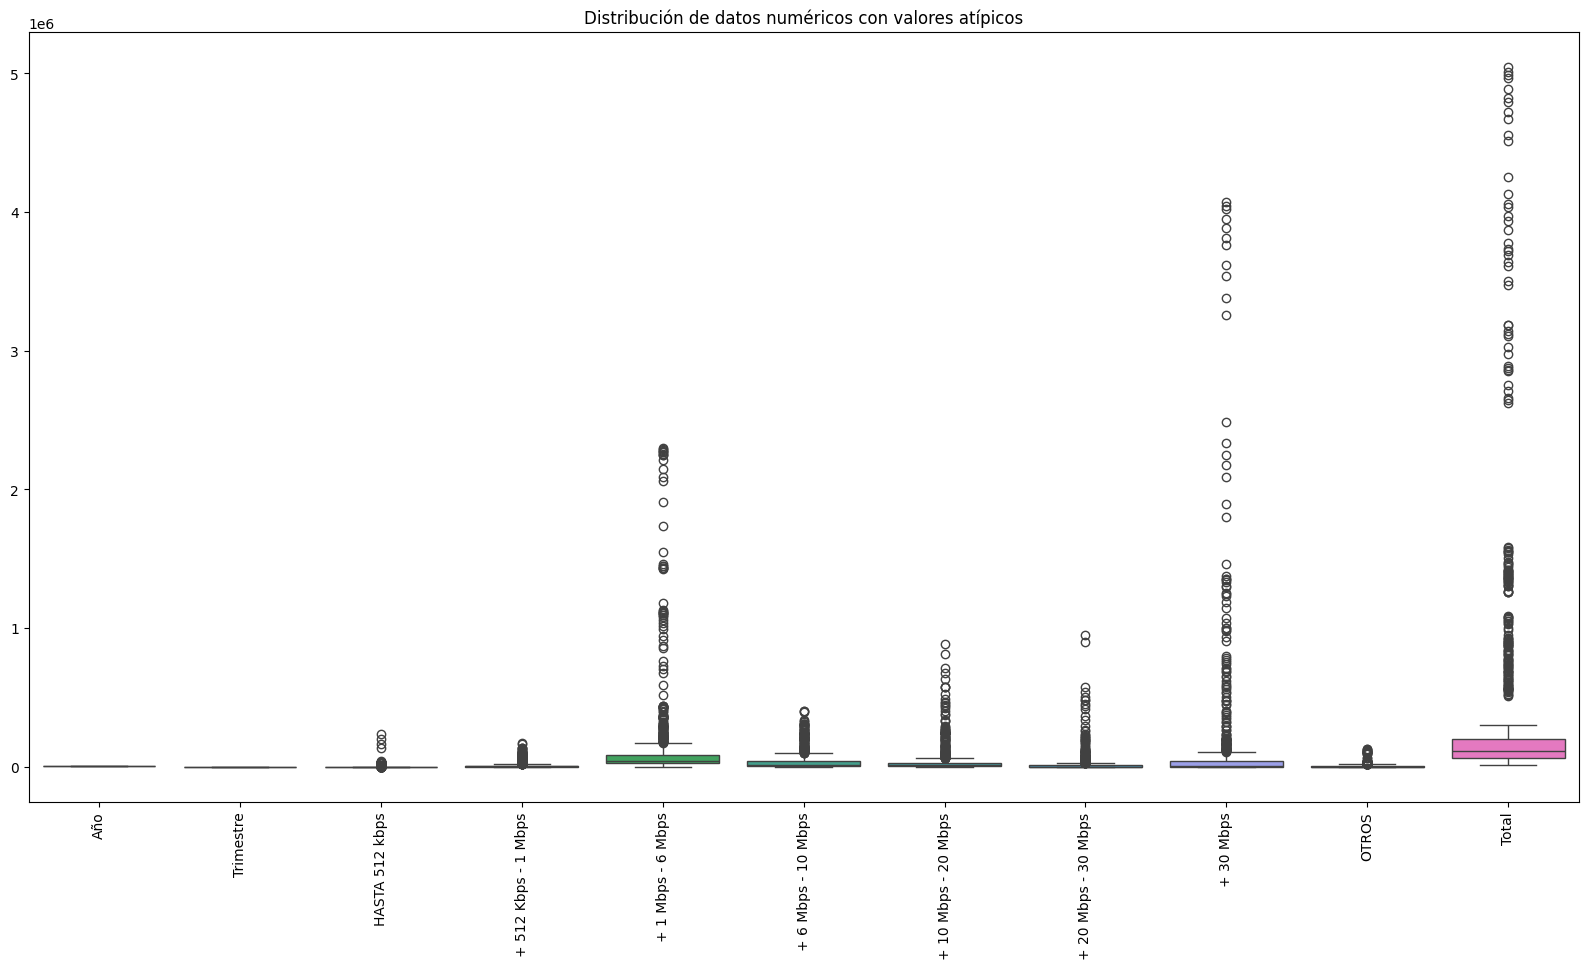

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Visualizar valores atípicos con un gráfico de caja y bigote
plt.figure(figsize=(20, 10))
sns.boxplot(data=df_Accesos_por_rangos.select_dtypes(include='number'))
plt.xticks(rotation=90)
plt.title("Distribución de datos numéricos con valores atípicos")
plt.show()

Columnas con valores negativos y sus conteos:
{'OTROS': np.int64(2)}


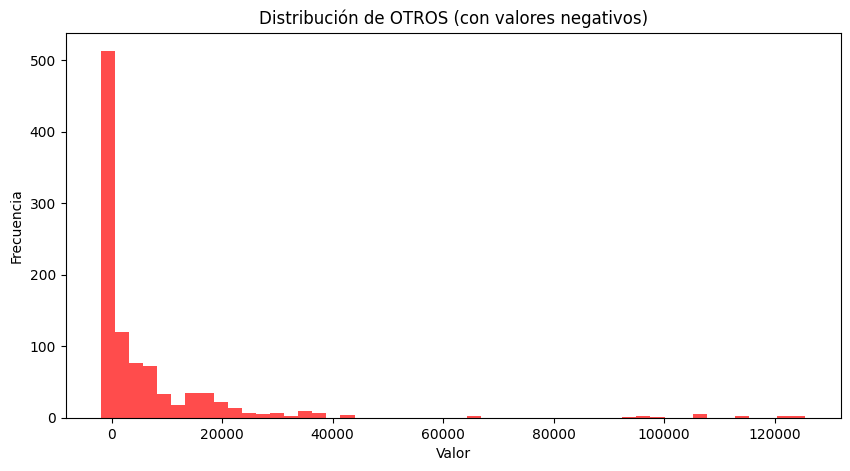

In [33]:
# Identificar columnas con valores negativos y contar cuántos hay
columnas_negativas = {}
for columna in df_Accesos_por_rangos.columns:
    if df_Accesos_por_rangos[columna].dtype != 'object' and (df_Accesos_por_rangos[columna] < 0).any():
        columnas_negativas[columna] = (df_Accesos_por_rangos[columna] < 0).sum()

print("Columnas con valores negativos y sus conteos:")
print(columnas_negativas)

# Visualizar las distribuciones de las columnas con valores negativos
import matplotlib.pyplot as plt

for columna, conteo in columnas_negativas.items():
    plt.figure(figsize=(10, 5))
    plt.hist(df_Accesos_por_rangos[columna], bins=50, color='red', alpha=0.7)
    plt.title(f"Distribución de {columna} (con valores negativos)")
    plt.xlabel('Valor')
    plt.ylabel('Frecuencia')
    plt.show()

In [35]:
import numpy as np

# Reemplazar valores negativos por NaN
for columna in columnas_negativas.keys():
    df_Accesos_por_rangos[columna] = df_Accesos_por_rangos[columna].apply(lambda x: np.nan if x < 0 else x)

# Confirmar que se han reemplazado los valores negativos
print("\nRevisión tras reemplazar valores negativos:")
for columna in columnas_negativas.keys():
    print(f"{columna}: {(df_Accesos_por_rangos[columna] < 0).sum()} valores negativos restantes")



Revisión tras reemplazar valores negativos:
OTROS: 0 valores negativos restantes


In [36]:
import numpy as np

# Reemplazar los valores negativos con NaN
df_Accesos_por_rangos[df_Accesos_por_rangos.select_dtypes(include='number') < 0] = np.nan

# Opcional: Si quieres rellenar los NaN con 0 u otro valor
# df_Accesos_por_rangos.fillna(0, inplace=True)


In [37]:
# Guardar las modificaciones en el mismo archivo CSV
df_Accesos_por_rangos.to_csv('C:/Users/maron.LAPTOP-UEJMOSD4/Desktop/PI_2/DATA_LIMPIO/Accesos_por_rangos.csv', index=False)